## SMS SPAM DETECTION USING WITH SUPPORT VECTOR MACHINE (SVM)

## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification

## READING THE DATA SET

In [2]:
data = pd.read_csv("C://Users//somen//Downloads//archive//spam.csv", encoding='latin1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## check the columns in the above dataset

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Data preprocessing

In [7]:
# Assuming 'v2' contains SMS messages and 'label' contains the labels
X = data['v2']  
y = data['v1']

In [8]:
## DATA PROCESSING

In [9]:

# Convert text data into numerical vectors using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [10]:


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [11]:
# 4. Model Training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:

# 5. Model Evaluation
svm_predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, svm_predictions)
confusion_mat = confusion_matrix(y_test, svm_predictions)
classification_rep = classification_report(y_test, svm_predictions)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.979372197309417
Confusion Matrix:
[[963   2]
 [ 21 129]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [13]:
# 6. Visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [14]:

# Map labels to numerical values for color coding
color_dict = {'ham': 0, 'spam': 1}
y_train_mapped = y_train.map(color_dict)
y_test_mapped = y_test.map(color_dict)


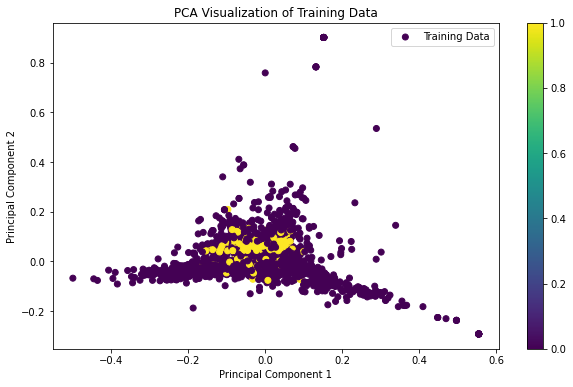

In [15]:

# Plotting training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_mapped, cmap='viridis', label='Training Data')
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar()
plt.show()

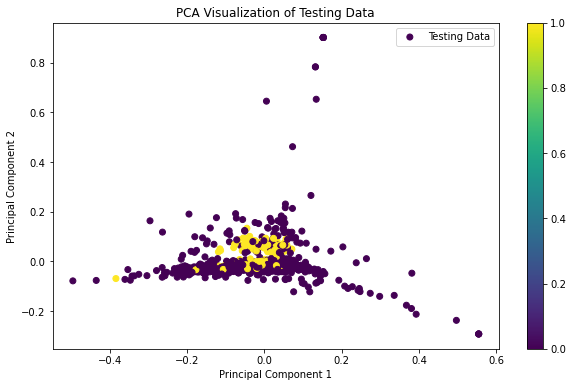

In [16]:

# Plotting testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_mapped, cmap='viridis', label='Testing Data')
plt.title('PCA Visualization of Testing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar()
plt.show()

In [17]:

#  Model Evaluation
svm_predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, svm_predictions)
confusion_mat = confusion_matrix(y_test, svm_predictions)
classification_rep = classification_report(y_test, svm_predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")






Accuracy: 0.979372197309417
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



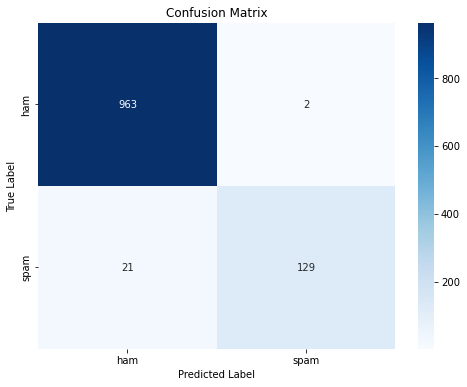

In [18]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
# 6. Prediction
# Example: Predicting on a new SMS message
new_sms = ["Free entry! Click here to win a prize!"]
new_sms_tfidf = tfidf_vectorizer.transform(new_sms)
prediction = svm_model.predict(new_sms_tfidf)
print(f"Prediction for the new SMS: {prediction}")

Prediction for the new SMS: ['spam']


In [20]:


# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_pca, y_train)






SVC(kernel='linear', random_state=42)

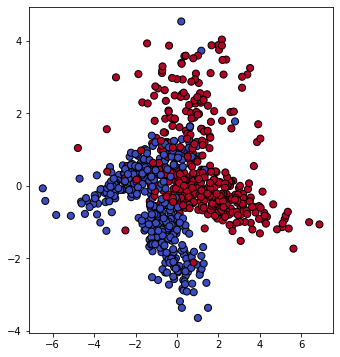

In [21]:
# Visualize training data and decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

Text(0, 0.5, 'Principal Component 2')

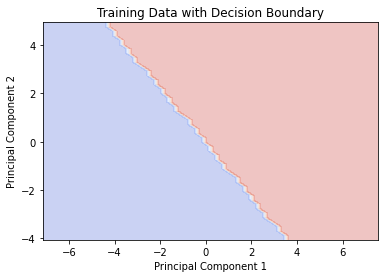

In [22]:

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Training Data with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

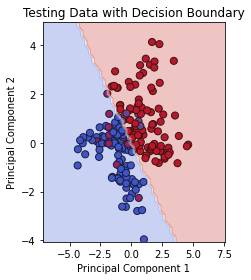

In [23]:
# Visualize the testing data and decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=50)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Testing Data with Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


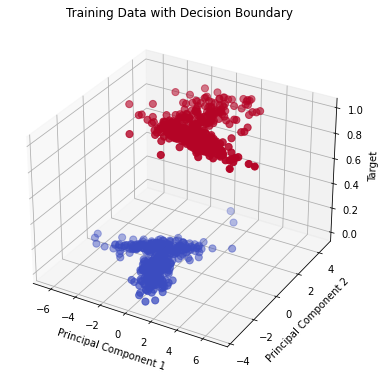

In [24]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# 3D Scatter Plot with Decision Boundary
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train, c=y_train, cmap='coolwarm', s=50)
ax1.set_title('Training Data with Decision Boundary')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Target')
plt.tight_layout()
plt.show()



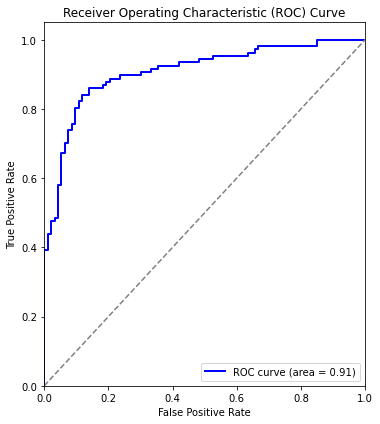

In [25]:
fig = plt.figure(figsize=(15, 6))
ax2 = fig.add_subplot(132)
fpr, tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test_pca))
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

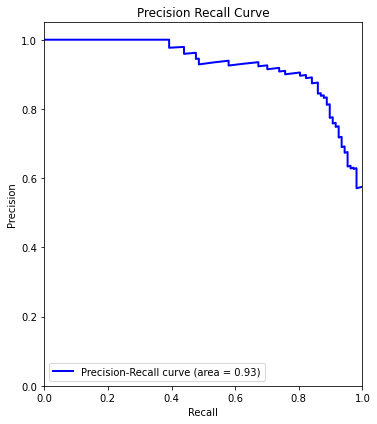

In [26]:

fig = plt.figure(figsize=(15, 6))
ax3 = fig.add_subplot(133)
precision, recall, _ = precision_recall_curve(y_test, svm_classifier.decision_function(X_test_pca))
pr_auc = auc(recall, precision)
ax3.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
ax3.set_title('Precision Recall Curve')
ax3.legend(loc='lower left')
plt.tight_layout()
plt.show()